In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
project_dir = Path("__file__").resolve().parents[2]
project_dir

PosixPath('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity')

In [3]:
wind = pd.read_csv('{}/data/processed/resources/onshore_processed.csv'.format(project_dir))
wind.head()


,Unnamed: 0,datetime,capacity_factor
0,0,1980-01-01 00:00:00,0.1496
1,1,1980-01-01 01:00:00,0.1502
2,2,1980-01-01 02:00:00,0.1485
3,3,1980-01-01 03:00:00,0.1470
4,4,1980-01-01 04:00:00,0.1489


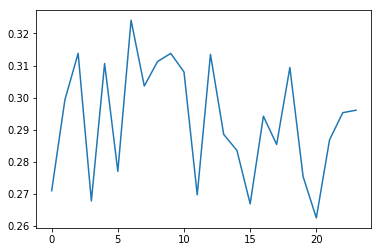

In [8]:
plt.plot(signal.resample(wind.capacity_factor, 24*1))

In [11]:
pv_data = pd.read_csv(
    '{}/data/processed/resources/pv_processed.csv'.format(project_dir))
pv_data.head()

,Unnamed: 0,datetime,capacity_factor
0,0,1980-01-01 00:00:00,0.0
1,1,1980-01-01 01:00:00,0.0
2,2,1980-01-01 02:00:00,0.0
3,3,1980-01-01 03:00:00,0.0
4,4,1980-01-01 04:00:00,0.0


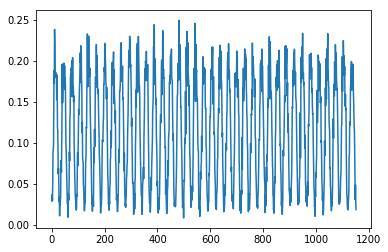

In [13]:
plt.plot(signal.resample(pv_data.capacity_factor, 24*48))

[0.46907358 0.46907358 0.46907358 ... 0.14652093 0.14652093 0.14652093]


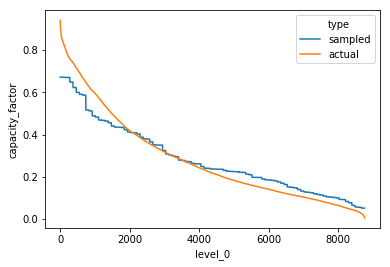

In [69]:
project_dir = Path("__file__").resolve().parents[2]
project_dir

data = pd.read_csv(
    '{}/data/processed/resources/onshore_processed.csv'.format(project_dir))

data = data[(data.datetime>"2014") & (data.datetime<"2015")]


data_sampled = np.repeat(signal.resample(data.capacity_factor, 24 * 4), 92)[:8760]
print(data_sampled)
data_sampled = pd.DataFrame({"capacity_factor": data_sampled})

data_ldc = data.sort_values('capacity_factor',
                            ascending=False).reset_index().reset_index()
data_ldc['type'] = "actual"

data_sampled_ldc = data_sampled.sort_values('capacity_factor',
                                            ascending=False).reset_index().reset_index()

data_sampled_ldc['type'] = "sampled"

joined_data = pd.concat([data_sampled_ldc, data_ldc], sort=True)
# joined_data
sns.lineplot(data=joined_data, hue='type', y='capacity_factor', x='level_0')
plt.show()

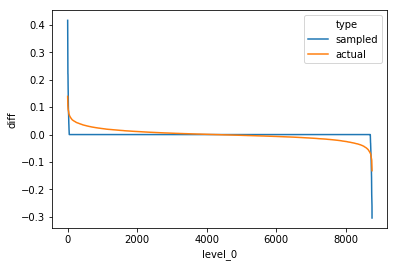

In [70]:
data['diff'] = data.capacity_factor.diff()
data_sorted = data.sort_values('diff', ascending=False).reset_index().reset_index()

data_sorted['type'] = 'actual'

data_sampled['diff'] = data_sampled.diff()
data_sampled['type'] = 'sampled'

data_sampled_sorted = data_sampled.sort_values('diff', ascending=False).reset_index().reset_index()

data_joined_rdc = pd.concat([data_sampled_sorted, data_sorted], sort=True)

# data_sorted.head()
sns.lineplot(data=data_joined_rdc, x="level_0", y="diff", hue='type')
plt.show()